In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Mental_Health.csv')
data.head()

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


In [4]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,500,500,U001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,500.0,NaN,NaN,NaN,32.988,9.960637,16.0,24.0,34.0,41.0,49.0
Gender,500,3,Male,248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Daily_Screen_Time(hrs),500.0,NaN,NaN,NaN,5.53,1.734877,1.0,4.3,5.6,6.7,10.8
Sleep_Quality(1-10),500.0,NaN,NaN,NaN,6.304,1.529792,2.0,5.0,6.0,7.0,10.0
Stress_Level(1-10),500.0,NaN,NaN,NaN,6.618,1.542996,2.0,6.0,7.0,8.0,10.0
Days_Without_Social_Media,500.0,NaN,NaN,NaN,3.134,1.858751,0.0,2.0,3.0,5.0,9.0
Exercise_Frequency(week),500.0,NaN,NaN,NaN,2.448,1.428067,0.0,1.0,2.0,3.0,7.0
Social_Media_Platform,500,6,TikTok,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Happiness_Index(1-10),500.0,NaN,NaN,NaN,8.376,1.524228,4.0,7.0,9.0,10.0,10.0


In [5]:
data.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Daily_Screen_Time(hrs)       0
Sleep_Quality(1-10)          0
Stress_Level(1-10)           0
Days_Without_Social_Media    0
Exercise_Frequency(week)     0
Social_Media_Platform        0
Happiness_Index(1-10)        0
dtype: int64

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
#Creating a categorized metric for Stress Rate
bins=[0, 5, 8, 12]
labels=['0-4', '5-7', '8-10']
data['Stress_Rate']= pd.cut(data['Stress_Level(1-10)'], bins=bins, labels=labels, right=False)


In [8]:
#Creating a categorized metric for Sleep Rate
bins=[0, 5, 8, 12]
labels=['Poor_Quality', 'Mid_Quality', 'High_Quality']
data['Sleep_Rate']=pd.cut(data['Sleep_Quality(1-10)'], bins=bins, labels=labels, right=False)

In [9]:
#Creating a categorized metric for Happiness Level
bins=[0, 5, 8, 12]
labels=['Sad', 'Satisfied', 'Joyful']
data['Happiness_Level']=pd.cut(data['Happiness_Index(1-10)'], bins=bins, labels=labels, right=False)

In [10]:
data.head() #Clean data after creating the new column metrics

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10),Stress_Rate,Sleep_Rate,Happiness_Level
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0,5-7,Mid_Quality,Joyful
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0,8-10,Mid_Quality,Joyful
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0,5-7,Mid_Quality,Satisfied
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0,8-10,Mid_Quality,Joyful
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0,5-7,Poor_Quality,Joyful


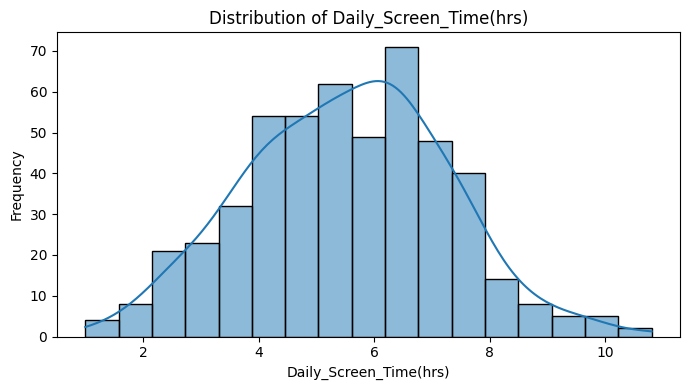

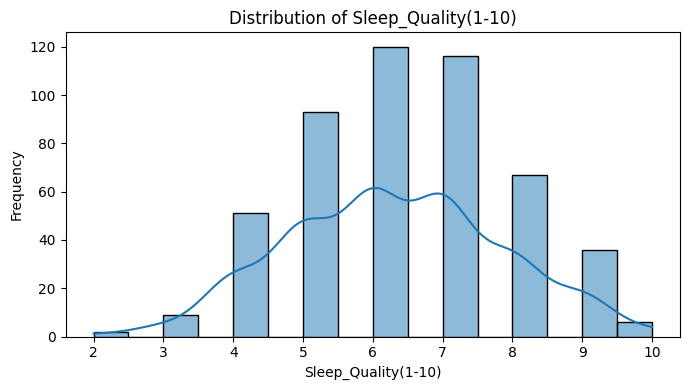

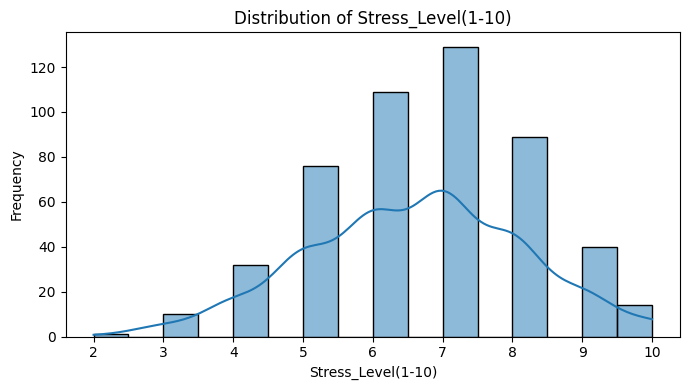

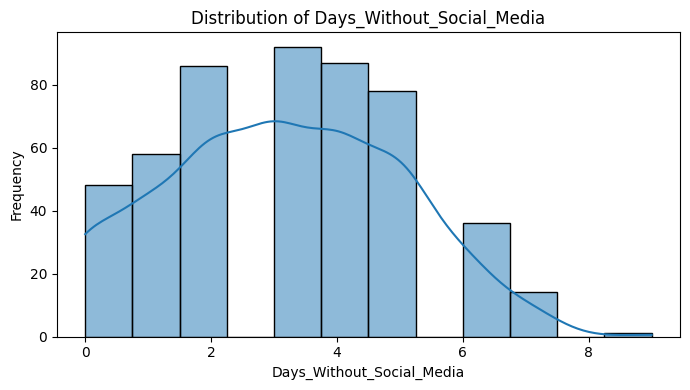

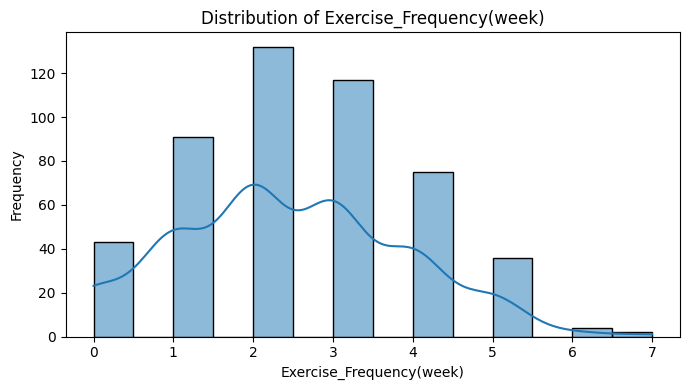

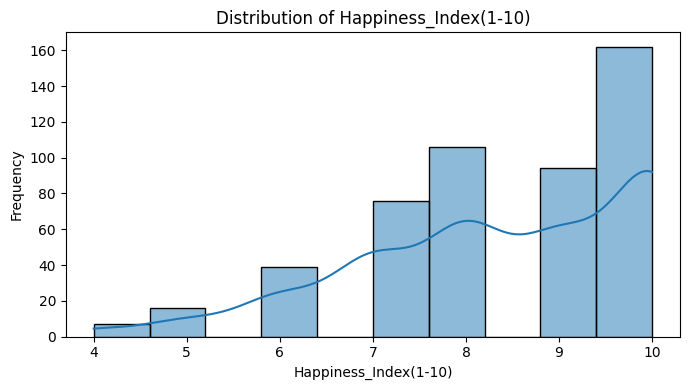

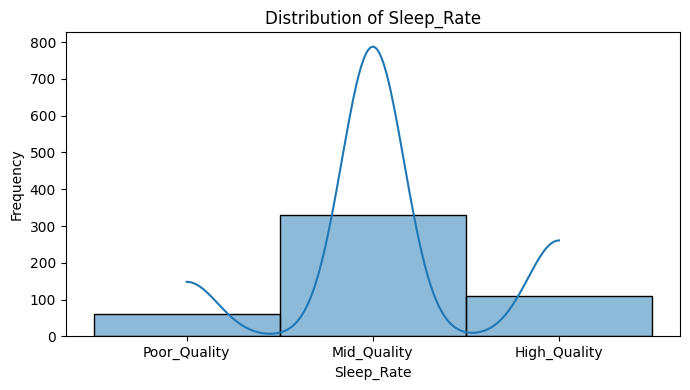

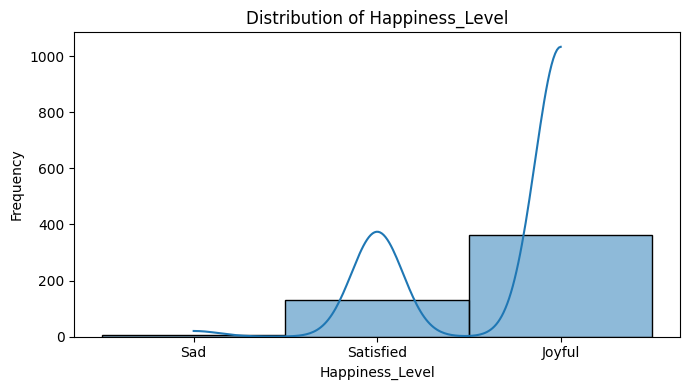

In [11]:
def plot_numeric_distributions(df):
    """
    Plots distribution plots (hist + KDE) for all numeric columns 
    except 'Age' and 'Stress_Rate'.
    """
    # Select numeric columns only
    numeric_cols = df.select_dtypes(exclude='object').columns.tolist()
    
    # Columns to exclude
    exclude_cols = ['Age', 'Stress_Rate']
    
    # Remove excluded columns if they exist
    for col in exclude_cols:
        if col in numeric_cols:
            numeric_cols.remove(col)
    
    # Plot each numeric column
    for col in numeric_cols:
        plt.figure(figsize=(7,4))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

plot_numeric_distributions(data)

In [12]:
data['Gender'].value_counts()

Gender
Male      248
Female    229
Other      23
Name: count, dtype: int64

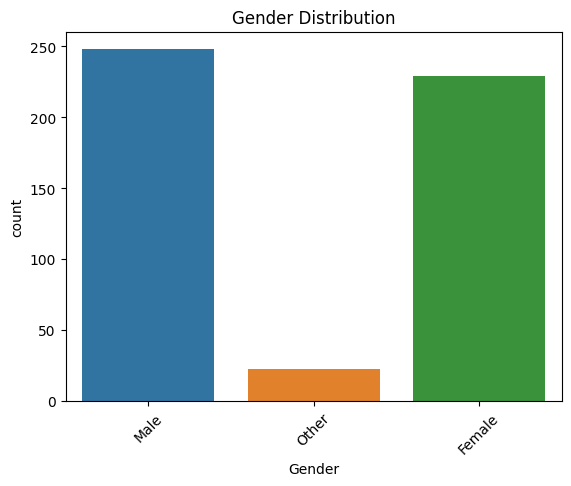

In [13]:
sns.countplot(data, x='Gender', hue='Gender')
plt.title('Gender Distribution')
plt.xticks(rotation=45)
plt.show()

In [14]:
data['Social_Media_Platform'].value_counts()

Social_Media_Platform
TikTok         95
X (Twitter)    88
LinkedIn       87
Facebook       81
YouTube        75
Instagram      74
Name: count, dtype: int64

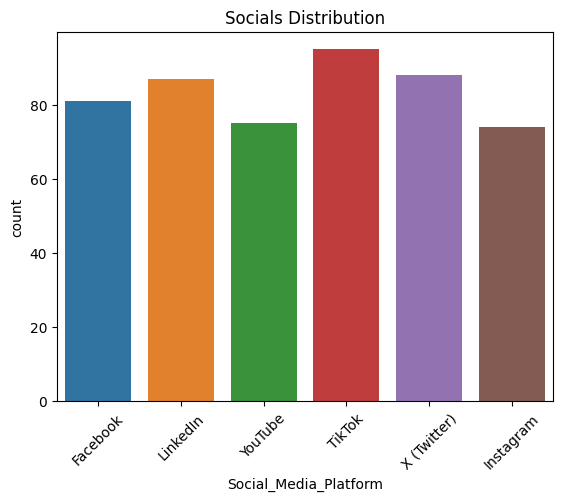

In [15]:
sns.countplot(data, x='Social_Media_Platform', hue='Social_Media_Platform')
plt.title('Socials Distribution')
plt.xticks(rotation=45)
plt.show()

In [16]:
data['Sleep_Rate'].value_counts()

Sleep_Rate
Mid_Quality     329
High_Quality    109
Poor_Quality     62
Name: count, dtype: int64

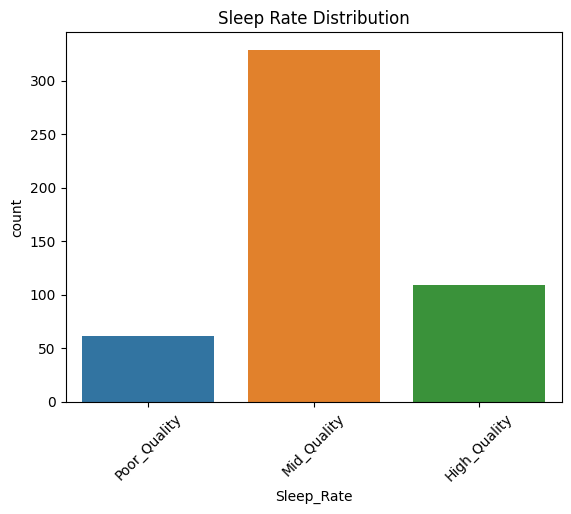

In [17]:
sns.countplot(data, x='Sleep_Rate', hue='Sleep_Rate')
plt.title('Sleep Rate Distribution')
plt.xticks(rotation=45)
plt.show()

In [18]:
data['Stress_Rate'].value_counts()

Stress_Rate
5-7     314
8-10    143
0-4      43
Name: count, dtype: int64

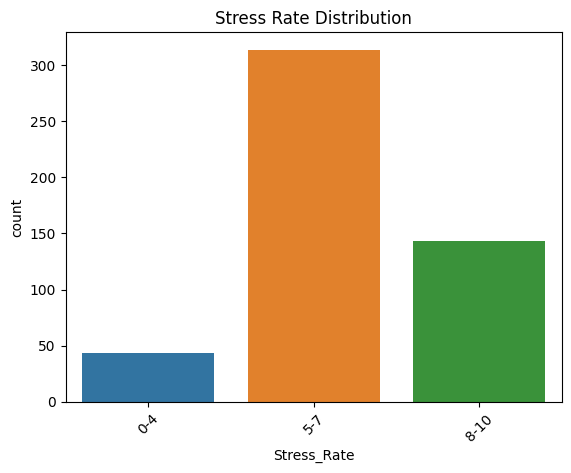

In [19]:
sns.countplot(data, x='Stress_Rate', hue='Stress_Rate')
plt.title('Stress Rate Distribution')
plt.xticks(rotation=45)
plt.show()

In [20]:
data['Happiness_Level'].value_counts()

Happiness_Level
Joyful       362
Satisfied    131
Sad            7
Name: count, dtype: int64

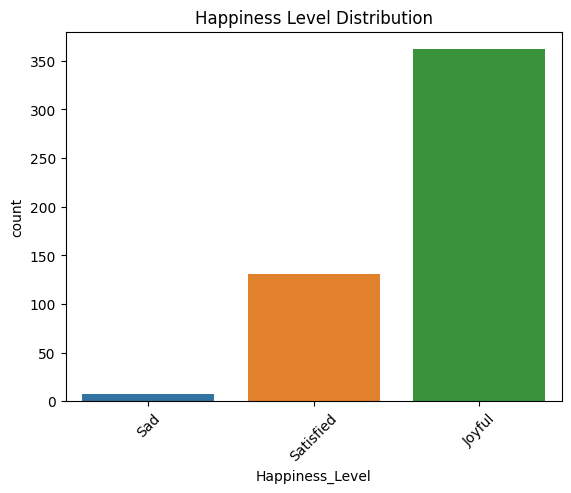

In [21]:
sns.countplot(data, x='Happiness_Level', hue='Happiness_Level')
plt.title('Happiness Level Distribution')
plt.xticks(rotation=45)
plt.show()

In [22]:
data.groupby('Stress_Rate')['Daily_Screen_Time(hrs)'].sum()

Stress_Rate
0-4      139.2
5-7     1603.1
8-10    1022.7
Name: Daily_Screen_Time(hrs), dtype: float64

In [23]:
data.groupby('Stress_Rate')['Days_Without_Social_Media'].sum()

Stress_Rate
0-4     139.0
5-7     979.0
8-10    449.0
Name: Days_Without_Social_Media, dtype: float64

In [24]:
data.groupby('Stress_Rate')['Exercise_Frequency(week)'].sum()

Stress_Rate
0-4     112.0
5-7     763.0
8-10    349.0
Name: Exercise_Frequency(week), dtype: float64

In [25]:
data.groupby('Happiness_Level')['Daily_Screen_Time(hrs)'].sum()

Happiness_Level
Sad            66.7
Satisfied     909.4
Joyful       1788.9
Name: Daily_Screen_Time(hrs), dtype: float64

In [26]:
data.groupby('Stress_Rate')['Sleep_Rate'].value_counts()

Stress_Rate  Sleep_Rate  
0-4          High_Quality     31
             Mid_Quality      12
             Poor_Quality      0
5-7          Mid_Quality     222
             High_Quality     74
             Poor_Quality     18
8-10         Mid_Quality      95
             Poor_Quality     44
             High_Quality      4
Name: count, dtype: int64

In [27]:
data.groupby('Gender')['Happiness_Level'].value_counts()

Gender  Happiness_Level
Female  Joyful             167
        Satisfied           56
        Sad                  6
Male    Joyful             176
        Satisfied           71
        Sad                  1
Other   Joyful              19
        Satisfied            4
        Sad                  0
Name: count, dtype: int64

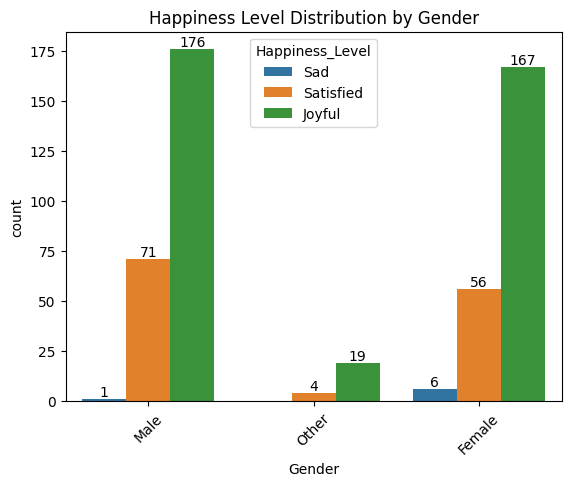

In [28]:
ax=sns.countplot(data, x='Gender', hue='Happiness_Level')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45)
plt.title('Happiness Level Distribution by Gender')
plt.show()    

In [29]:
data.groupby('Gender')['Stress_Rate'].value_counts()

Gender  Stress_Rate
Female  5-7            142
        8-10            65
        0-4             22
Male    5-7            154
        8-10            74
        0-4             20
Other   5-7             18
        8-10             4
        0-4              1
Name: count, dtype: int64

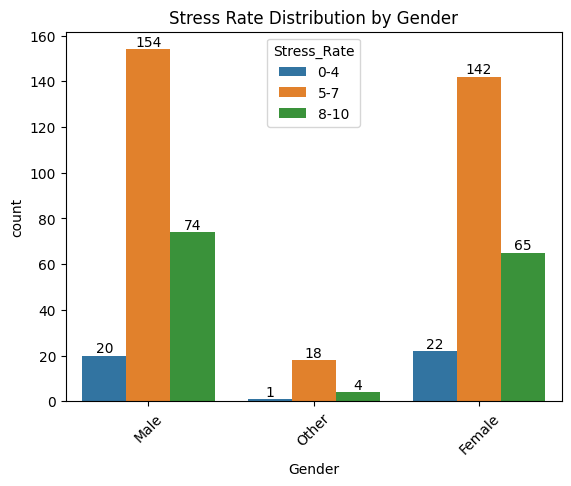

In [30]:
ax=sns.countplot(data, x='Gender', hue='Stress_Rate')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Stress Rate Distribution by Gender')
plt.xticks(rotation=45)
plt.show()    

In [31]:
data.groupby('Gender')['Sleep_Rate'].value_counts()

Gender  Sleep_Rate  
Female  Mid_Quality     141
        High_Quality     53
        Poor_Quality     35
Male    Mid_Quality     173
        High_Quality     50
        Poor_Quality     25
Other   Mid_Quality      15
        High_Quality      6
        Poor_Quality      2
Name: count, dtype: int64

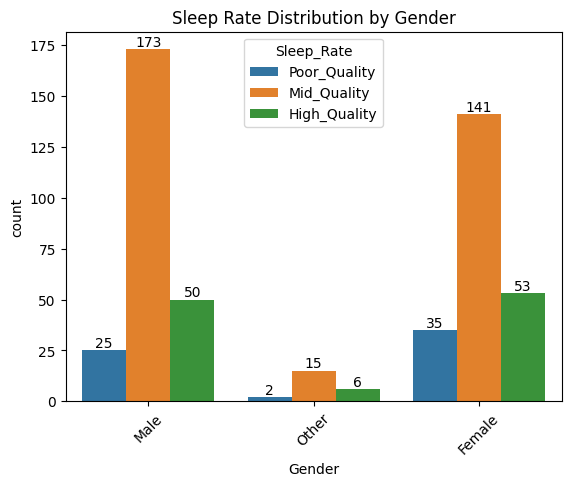

In [32]:
ax=sns.countplot(data, x='Gender', hue='Sleep_Rate')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Sleep Rate Distribution by Gender')
plt.xticks(rotation=45)
plt.show()

In [33]:
data.groupby('Gender')['Social_Media_Platform'].value_counts()

Gender  Social_Media_Platform
Female  Facebook                 46
        LinkedIn                 44
        TikTok                   44
        X (Twitter)              36
        YouTube                  32
        Instagram                27
Male    TikTok                   48
        X (Twitter)              46
        Instagram                44
        LinkedIn                 39
        YouTube                  37
        Facebook                 34
Other   X (Twitter)               6
        YouTube                   6
        LinkedIn                  4
        Instagram                 3
        TikTok                    3
        Facebook                  1
Name: count, dtype: int64

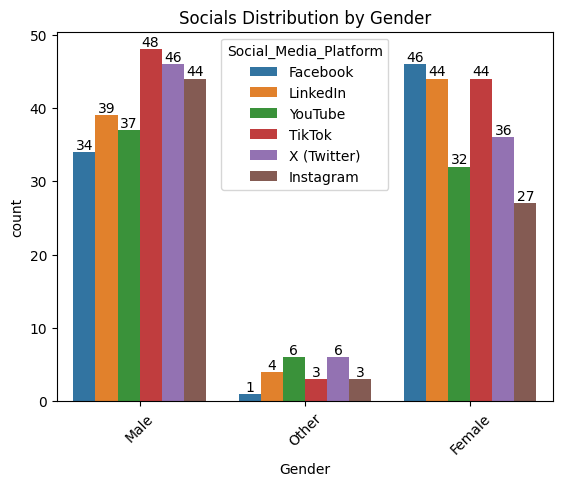

In [34]:
ax=sns.countplot(data, x='Gender', hue='Social_Media_Platform')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Socials Distribution by Gender')
plt.xticks(rotation=45)
plt.show()

In [ ]:
Platform Preferences
Females: Facebook, LinkedIn, TikTok

Males: TikTok, X (Twitter), Instagram

Others: Mostly Twitter & YouTube

In [ ]:
Bivariate Analysis — Key Comparisons
*Happiness by Gender

-Both Male and Female users show high counts of Joyful.

-Very few cases of Sadness, especially among the "Other" gender category.

*Stress by Gender

-Similar stress distribution across genders.

-Medium stress (5–7) is most common for all groups.

*Sleep Quality by Gender

-Mid-Quality sleep is the most reported across all genders.

*Platform Preferences by Gender

-Females use Facebook and TikTok highly.

-Males lean toward TikTok, Twitter, and Instagram.

*Screen Time vs Stress

-Medium stress group recorded the highest total screen time (1603+ hrs).

-High-stress individuals also had elevated screen use.

*Exercise vs Stress

-Medium stress users had the highest exercise totals—an interesting contradiction.

*Happiness vs Daily Screen Time

-Joyful users accounted for the highest total screen time.

*Sleep Quality vs Stress

-Poor sleep quality becomes more common in high-stress groups

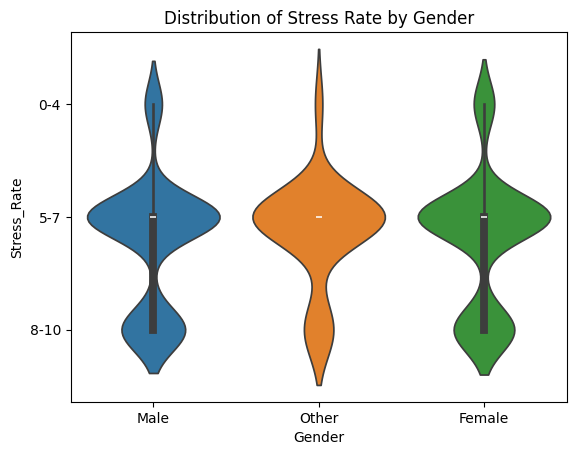

In [35]:
sns.violinplot(data, x='Gender', y='Stress_Rate', hue='Gender')
plt.title('Distribution of Stress Rate by Gender')
plt.show()

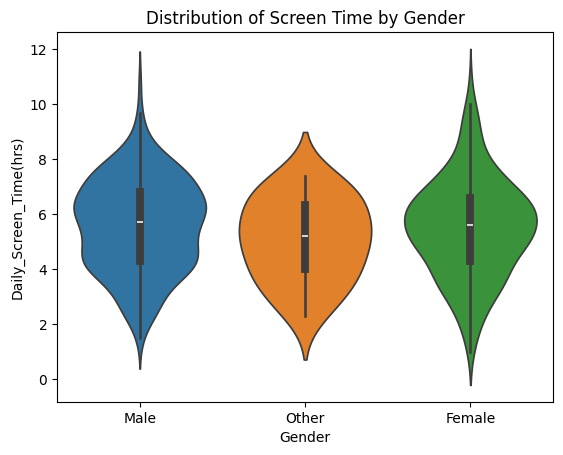

In [36]:
sns.violinplot(data, x='Gender', y='Daily_Screen_Time(hrs)', hue='Gender')
plt.title('Distribution of Screen Time by Gender')
plt.show()

In [ ]:
I used violin plots to show:

Stress distribution by gender

Screen time distribution by gender

These provided deeper visibility into spread and density beyond simple averages

In [ ]:
📌 Higher screen time tended to align with higher stress levels.
📌 Sleep quality trends worsen with higher stress
📌 Most users fall within mid-range sleep and mid-range stress categories.
📌 Happiness levels skew positively, suggesting strong coping or lifestyle factors.
📌 Happiness levels remain high even with rising stress — suggesting coping or lifestyle balancing.
📌 Social media usage patterns are distinct across genders, but not extreme.
📌 Moderate stress is the most common, and surprisingly, the most active group (screen time & exercise).
📌 Gender strongly influences platform choices, but not happiness or sleep quality as much as expected.
